# ＮＦインド株 (1678)

In [7]:
import datetime as dt
#import japanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import mplfinance as mpf
import yfinance as yf

# Matplotlib用に日本語フォントの設定
FONT_PATH = '../fonts/RictyDiminished-Regular.ttf'
fm.fontManager.addfont(FONT_PATH)

font_prop = fm.FontProperties(fname=FONT_PATH)
plt.rcParams['font.family'] = font_prop.get_name()
font_prop.get_name()

'Ricty Diminished'

In [8]:
class Target:
    symbol = None
    name = None

In [43]:
target = Target()
target.symbol = '1678.T'
target.name = 'ＮＦインド株'
ticker = yf.Ticker(target.symbol)

## 過去６ヶ月の日足データ

In [44]:
df = ticker.history(period='6mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-02-09 00:00:00+09:00,343.899994,344.000000,341.399994,342.799988,2560070,0.0,0.0,0.0
2024-02-13 00:00:00+09:00,342.799988,343.600006,337.000000,343.399994,3458240,0.0,0.0,0.0
2024-02-14 00:00:00+09:00,343.000000,343.899994,341.700012,343.399994,1420780,0.0,0.0,0.0
2024-02-15 00:00:00+09:00,345.600006,348.000000,345.500000,346.100006,3125570,0.0,0.0,0.0
2024-02-16 00:00:00+09:00,347.799988,350.600006,347.799988,350.299988,2704200,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-08-05 00:00:00+09:00,359.000000,360.899994,339.799988,341.000000,15343780,0.0,0.0,0.0
2024-08-06 00:00:00+09:00,359.500000,362.399994,356.799988,360.600006,5606640,0.0,0.0,0.0
2024-08-07 00:00:00+09:00,355.799988,367.200012,353.299988,363.000000,4838000,0.0,0.0,0.0


### ローソク足チャートと出来高

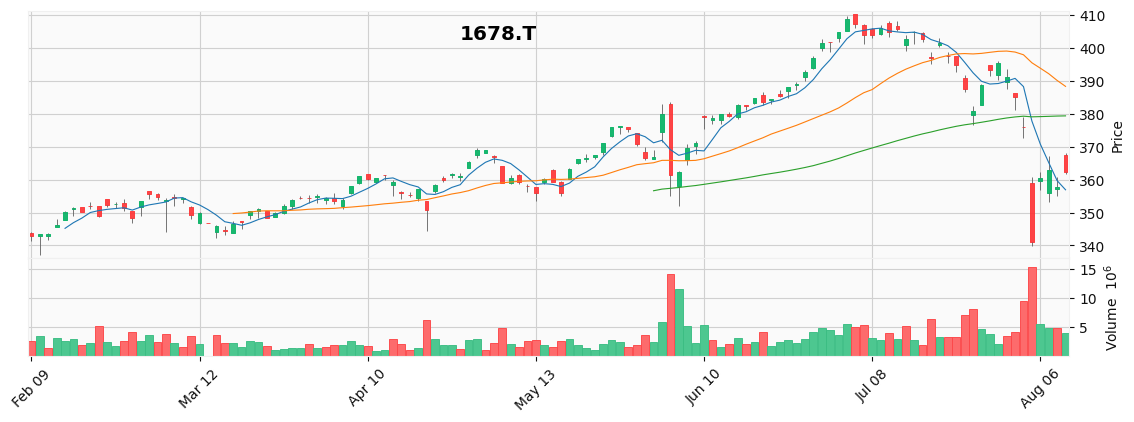

In [54]:
mpf.plot(
    df, type='candle', style='yahoo', mav=(5, 25, 75),
    volume=True,
    title=target.symbol,
    figsize=(12, 4),
    tight_layout=True
)

plt.show()

### ローソク足チャートと出来高、モメンタム

Reference: https://mekatana.com/python-momentum/

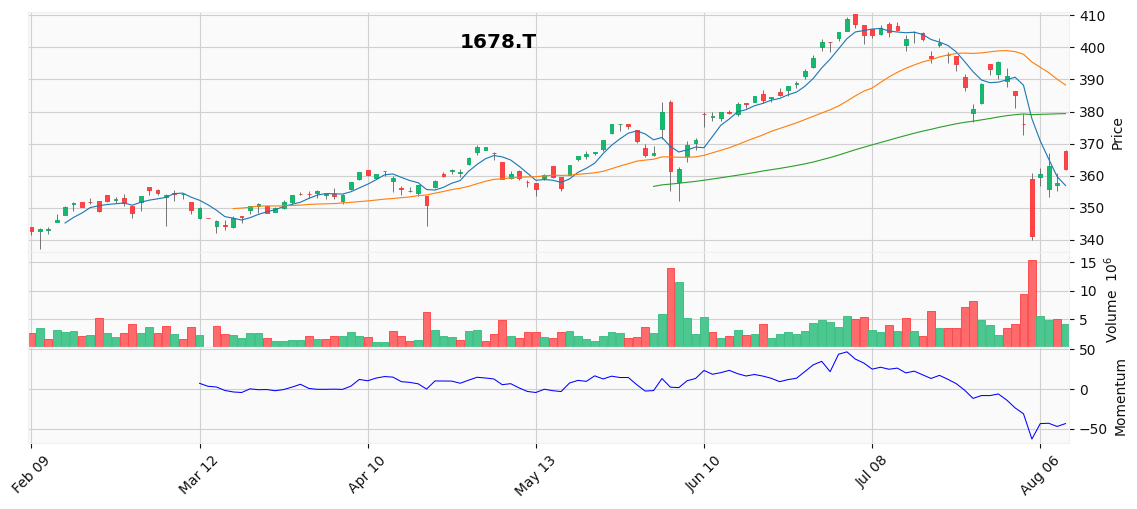

In [69]:
# モメンタム
period = 20
df['momentum'] = df['Close'] - df['Close'].shift(period)

apd_roscillator = [
    mpf.make_addplot(df['momentum'], panel=2, ylabel='Momentum', color='b', width=0.75)
]

# チャート描写
mpf.plot(
    df, type='candle', style='yahoo', mav=(5, 25, 75),
    volume=True,
    addplot=apd_roscillator,
    title=target.symbol,
    figsize=(12, 5),
    tight_layout=True
)


### ローソク足チャートとボリンジャーバンド

Reference: https://mekatana.com/bollinger-bands-python/

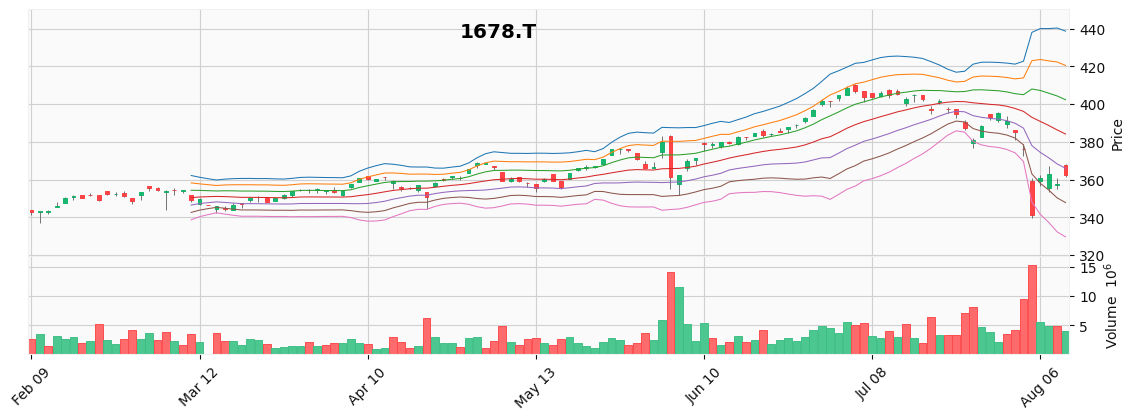

In [71]:
period = 20
r = df['Close'].rolling(period)    
df['upper3'] = r.mean() + 3 * r.std()
df['upper2'] = r.mean() + 2 * r.std()
df['upper1'] = r.mean() + 1 * r.std()
df['mean'] = r.mean()
df['lower1'] = r.mean() - 1 * r.std()
df['lower2'] = r.mean() - 2 * r.std()
df['lower3'] = r.mean() - 3 * r.std()

df_upper3_max=df['upper3'].max() + 10
df_lower3_min=df['lower3'].min() - 10 

apd_oscilator  = [
    mpf.make_addplot(df[['upper3', 'upper2', 'upper1','mean', 'lower1', 'lower2', 'lower3']], width=0.75)
]   

mpf.plot(
    df, type='candle', style='yahoo',
    volume=True,
    title=target.symbol,
    addplot=apd_oscilator,
    ylim=(df_lower3_min, df_upper3_max),
    figsize=(12, 4),
    tight_layout=True,
)